# Homework 1
due 09/10/2025 23:59

In [28]:
# deps
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from utils import phase_portrait

## Problem 3
1) Find equilibrium points for 
\begin{align}
    \dot x_1 &= x_2 \\
    \dot x_2 &= -x_1 + \frac{1}{16}x_1^5 - x_2
\end{align}
2) Plot the phase portrait

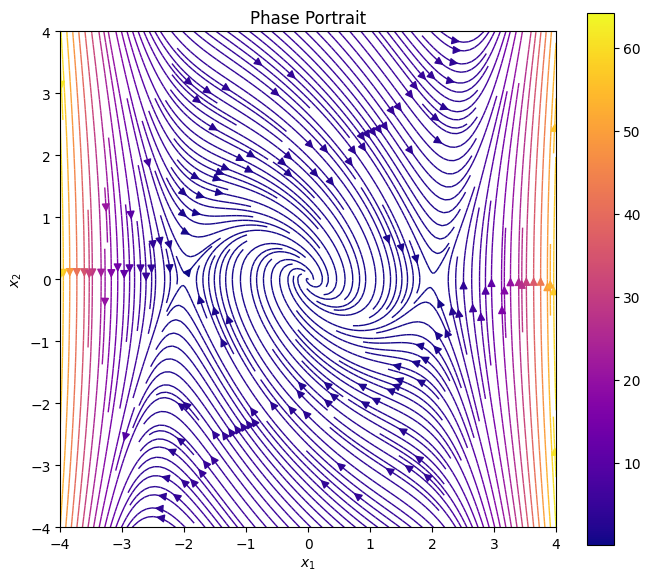

In [ ]:
def dynamics(
    t: float | None,
    state: list,
) -> list:
    x1, x2 = state
    dx1 = x2
    dx2 = -x1 + x1**5/16 - x2
    return [dx1, dx2]

phase_portrait(x_max=4, n_pts=100, dynamics=dynamics, save=False)


## Problem 4
1) Sketch the phase portrait for
\begin{align}
    \dot x_1 &= x_2 \\
    \dot x_2 &= -k x_1 - c x_2 - \eta(x_1, x_2)
\end{align}
2) Describe the behavior qualitatively

    The phase portrait has an unstable node at the origin, with circular orbits on either side of the $x_1$ plane. The behavior is disjoint about $x_2$ given the sign function in the dynamics.

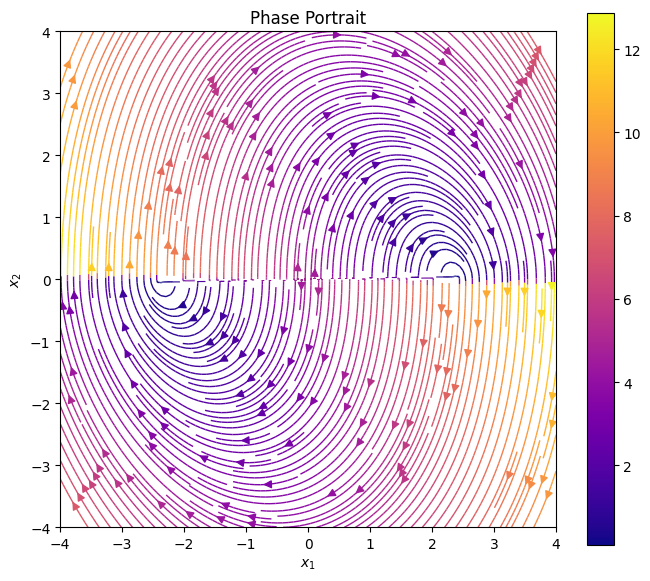

In [ ]:
def sign(n):
    return np.where(
        n > 0,
        1,
        np.where(
            n < 0,
            -1,
            0
        )
    )

def eta(
    state: list,
    k: float,
    m: float,
    g: float,
    mu_k: float,
    mu_s: float,
):
    x1, x2 = state
    return np.where(
        np.abs(x2) > 0,
        mu_k * m * g * sign(x2),
        np.where(
            np.abs(x1) <= mu_s * m * g / k,
            -k * x1,
            mu_s * m * g * sign(x1)
        )
    )    

def dynamics(
    t: float | None,
    state: list,
    k: float = 2.0,
    c: float = 1.0,
    m: float = 1.0,
    g: float = -9.8,
    mu_k: float = 0.5,
    mu_s: float = 0.5,
) -> list:
    x1, x2 = state
    dx1 = x2
    dx2 = -k * x1 -c * x2 - eta(state, k, m, g, mu_k, mu_s)
    return [dx1, dx2]

phase_portrait(x_max=4, n_pts=100, dynamics=dynamics, save=False)

## Problem 5
1) Sketch phase portraits for $u=1$ and $u=-1$
\begin{align}
    \dot x_1 &= x_2 \\
    \dot x_2 &= u
\end{align}
2) Develop graphical control strategy

    Define switching curve $x_1 = \pm\frac{x^2_2}{2}$. Then, from anywhere in $x_1-x_2$ plane, the origin can be obtained by following the corresponding curve. When above the curve, apply negative control input; when below the curve, apply positive control input. This is a "bang bang" controller.

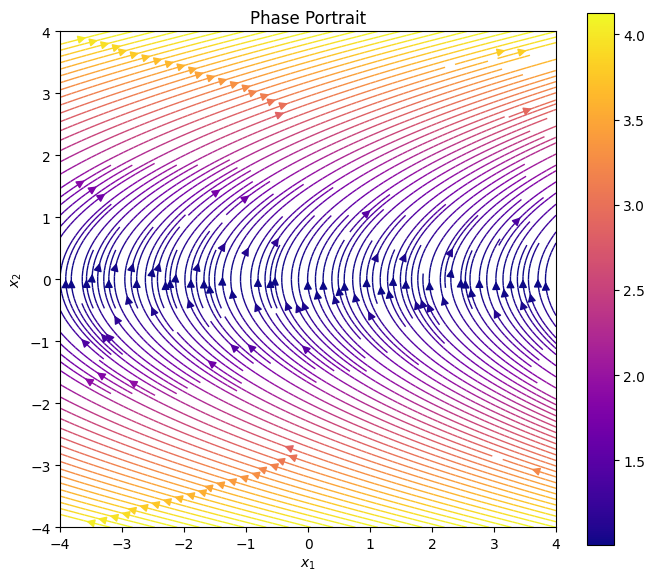

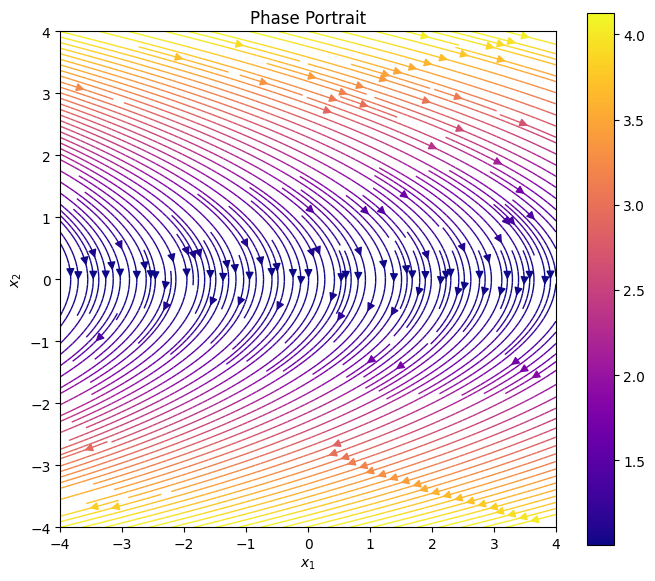

In [ ]:
def dynamics(
        t: float | None,
        state: list,
        u: float,
) -> list:
    x1, x2 = state
    dx1 = x2
    dx2 = u * np.ones_like(x2)
    return [dx1, dx2]

def set_u(u) -> Callable[..., list]:
    def wrapped_dynamics(t, state):# -> list:
        return dynamics(t, state, u)
    return wrapped_dynamics

dynamics_plus = set_u(1)
dynamics_minus = set_u(-1)

phase_portrait(x_max=4, n_pts=100, dynamics=dynamics_plus, save=False)
phase_portrait(x_max=4, n_pts=100, dynamics=dynamics_minus, save=False)